## Observations and Insights 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(study_results, how = 'inner', on = 'Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_ID = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep = False)]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[combined_df["Mouse ID"].isin(dup_ID)==False]

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    # create a group by set from the clean data
group_df = clean_df.groupby('Drug Regimen')
mean = group_df['Tumor Volume (mm3)'].mean()
median = group_df['Tumor Volume (mm3)'].median()
variance = group_df['Tumor Volume (mm3)'].var()
std = group_df['Tumor Volume (mm3)'].std()
sem = group_df['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_df = pd.DataFrame({'Mean Tumor Volume': mean,
              'Median Tumor Volume': median,
              'Tumor Volume Variance': variance,
              'Tumor Volume Std. Dev.': std,
              'Tumor Volume Std. Err.': sem
              })
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
group_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# %matplotlib notebook

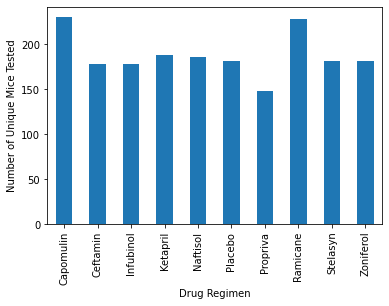

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study 
# get count per drug regiem
count = group_df['Mouse ID'].count()

# using pandas
count.plot(kind="bar")
plt.ylabel("Number of Unique Mice Tested")
plt.show;

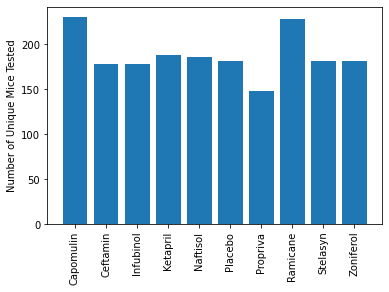

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study 
# using pyplot.
x_axis = np.arange(len(count))
plt.bar(x_axis, count)
tick_locations = [value for value in x_axis]
label = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
plt.xticks(tick_locations, labels=label, rotation="vertical")
plt.ylabel("Number of Unique Mice Tested")
plt.show;

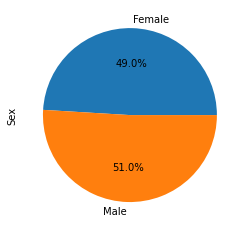

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df.groupby('Sex')

gender_count = gender['Sex'].count()

# using pandas
gender_count.plot(kind="pie", autopct="%.1f%%")
plt.show;

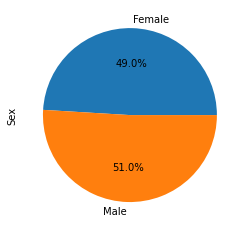

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, labels = ['Female', 'Male'], autopct="%.1f%%")
plt.ylabel('Sex')
plt.show;

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_df.groupby('Mouse ID').max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
finalTumor = max_timepoint[["Mouse ID", "Timepoint"]].merge(clean_df, on =["Mouse ID","Timepoint"], how="left")

finalTumor.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentList = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatmentList:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVol_S = finalTumor.loc[finalTumor['Drug Regimen']== treatment, 'Tumor Volume (mm3)']
   
    # add subset 
    tumorVol.append(tumorVol_S)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorVol_S.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumorVol_S.loc[(tumorVol_S < lower_bound) | (tumorVol_S > upper_bound)]
    
    print(f'{treatment}: outliers {outliers}')

Capomulin: outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


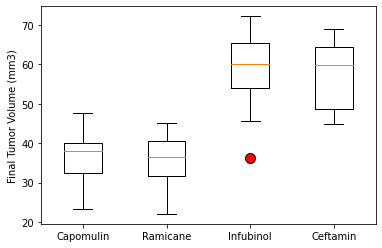

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin = finalTumor.loc[finalTumor['Drug Regimen']== 'Capomulin', 'Tumor Volume (mm3)']
ramicane = finalTumor.loc[finalTumor['Drug Regimen']== 'Ramicane', 'Tumor Volume (mm3)']
infubinol = finalTumor.loc[finalTumor['Drug Regimen']== 'Infubinol', 'Tumor Volume (mm3)']
ceftamin = finalTumor.loc[finalTumor['Drug Regimen']== 'Ceftamin', 'Tumor Volume (mm3)']

outlier_prop = dict(marker='o', markerfacecolor='r', markersize=10)

plt.boxplot([capomulin, ramicane, infubinol, ceftamin], labels = treatmentList, flierprops= outlier_prop)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show;

## Line and Scatter Plots

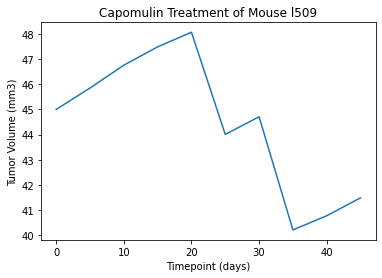

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
line_plot_df = clean_df.loc[(clean_df['Drug Regimen']== 'Capomulin') & (clean_df['Mouse ID']== 'l509') ,:]

plt.plot(line_plot_df['Timepoint'], line_plot_df['Tumor Volume (mm3)'])
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show();

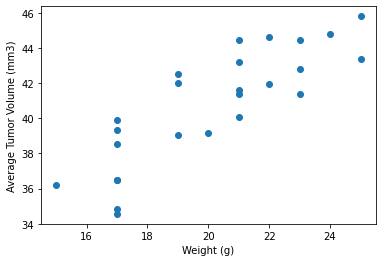

In [33]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = clean_df.loc[(clean_df['Drug Regimen']== 'Capomulin'), :]
avg_capomulin = capomulin_df.groupby('Mouse ID').mean()

plt.scatter(avg_capomulin['Weight (g)'], avg_capomulin['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show;

## Correlation and Regression

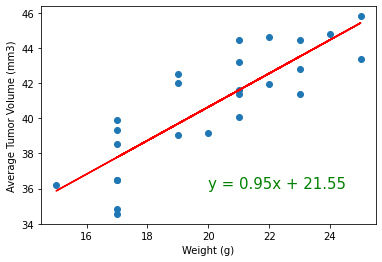

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_capomulin['Weight (g)']
y_values = avg_capomulin['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq ,(20,36),fontsize=15,color="green")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show;

In [40]:
print(f'The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}')

The correlation between mouse weight and the average tumor volume is 0.84
